## Установка параметров и генерация выборок

#### Математическое пояснение:
Задаем параметры для генерации двух выборок $X_1$ и $X_2$ из нормального распределения $N(\mu, \sigma^2)$, где:
- $\mu$ — математическое ожидание.
- $\sigma^2$ — дисперсия.
- $N = 100$ — объем каждой выборки.

Четыре случая:
- а. $\mu_1 = \mu_2$, $\sigma_1^2 \neq \sigma_2^2$.
- б. $\mu_1 \neq \mu_2$, $\sigma_1^2 = \sigma_2^2$.
- в. $\mu_1 \neq \mu_2$, $\sigma_1^2 \neq \sigma_2^2$.
- г. $\mu_1 = \mu_2$, $\sigma_1^2 = \sigma_2^2$.

#### Простыми словами:
Тут подключаем инструменты и задаем настройки для создания двух наборов случайных чисел, которые будут следовать нормальному распределению. Разные случаи — это разные комбинации среднего и разброса.

In [6]:
# Установка параметров
N <- 100
# Случай а: одинаковые мат. ожидания, разные дисперсии
mu1_a <- 0; mu2_a <- 0
sigma1_a <- 1; sigma2_a <- 2
# Случай б: разные мат. ожидания, одинаковые дисперсии
mu1_b <- 0; mu2_b <- 1
sigma1_b <- 1; sigma2_b <- 1
# Случай в: разные мат. ожидания, разные дисперсии
mu1_c <- 0; mu2_c <- 1
sigma1_c <- 1; sigma2_c <- 2
# Случай г: одинаковые мат. ожидания, одинаковые дисперсии
mu1_d <- 0; mu2_d <- 0
sigma1_d <- 1; sigma2_d <- 1

## Генерация выборок


In [7]:
# Генерация выборок
set.seed(123) # Для воспроизводимости
sample1_a <- rnorm(N, mean = mu1_a, sd = sigma1_a)
sample2_a <- rnorm(N, mean = mu2_a, sd = sigma2_a)
sample1_b <- rnorm(N, mean = mu1_b, sd = sigma1_b)
sample2_b <- rnorm(N, mean = mu2_b, sd = sigma2_b)
sample1_c <- rnorm(N, mean = mu1_c, sd = sigma1_c)
sample2_c <- rnorm(N, mean = mu2_c, sd = sigma2_c)
sample1_d <- rnorm(N, mean = mu1_d, sd = sigma1_d)
sample2_d <- rnorm(N, mean = mu2_d, sd = sigma2_d)

## Проверка нормальности (критерий Шапиро-Уилка)

#### Математическое пояснение:
Критерий Шапиро-Уилка проверяет нормальность:
- $H_0$: выборка распределена нормально.
- Статистика: $W = \frac{(\sum_{i=1}^n a_i x_{(i)})^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$, где $x_{(i)}$ — упорядоченные данные.
- $p$-значение сравнивается с уровнем значимости $\alpha = 0.05$.

#### Простыми словами:
Проверяем, похожи ли наши данные на нормальное распределение. Если $p$-значение больше 0.05, значит, все ок.

In [3]:
# Функция для проверки нормальности
check_normality <- function(sample1, sample2, case) {
  shapiro1 <- shapiro.test(sample1)
  shapiro2 <- shapiro.test(sample2)
  cat(sprintf("\nСлучай %s:\n", case))
  cat(sprintf("Шапиро-Уилка для X1: статистика = %.4f, p-значение = %.4f\n", shapiro1$statistic, shapiro1$p.value))
  cat(sprintf("Шапиро-Уилка для X2: статистика = %.4f, p-значение = %.4f\n", shapiro2$statistic, shapiro2$p.value))
  if (shapiro1$p.value > 0.05 & shapiro2$p.value > 0.05) {
    cat("Обе выборки нормальны (p > 0.05)\n")
  } else {
    cat("Есть отклонение от нормальности (p ≤ 0.05)\n")
  }
}

# Проверка нормальности
check_normality(sample1_a, sample2_a, "а")
check_normality(sample1_b, sample2_b, "б")
check_normality(sample1_c, sample2_c, "в")
check_normality(sample1_d, sample2_d, "г")


Случай а:
Шапиро-Уилка для X1: статистика = 0.9939, p-значение = 0.9349
Шапиро-Уилка для X2: статистика = 0.9729, p-значение = 0.0369
Есть отклонение от нормальности (p ≤ 0.05)

Случай б:
Шапиро-Уилка для X1: статистика = 0.9760, p-значение = 0.0651
Шапиро-Уилка для X2: статистика = 0.9943, p-значение = 0.9511
Обе выборки нормальны (p > 0.05)

Случай в:
Шапиро-Уилка для X1: статистика = 0.9839, p-значение = 0.2661
Шапиро-Уилка для X2: статистика = 0.9963, p-значение = 0.9954
Обе выборки нормальны (p > 0.05)

Случай г:
Шапиро-Уилка для X1: статистика = 0.9948, p-значение = 0.9689
Шапиро-Уилка для X2: статистика = 0.9753, p-значение = 0.0572
Обе выборки нормальны (p > 0.05)


## Гистограммы с оценками плотностей и средними значениями



#### Математическое пояснение:
Строим гистограммы относительных частот для $X_1$ и $X_2$:
- Относительная частота: $\frac{n_i}{N \cdot h}$, где $n_i$ — число значений в интервале, $h$ — ширина интервала.
- Оценка плотности: ядерная оценка (KDE) с помощью $gaussian_kde$.
- Средние значения: $\bar{x}_1$ и $\bar{x}_2$, отмечаются вертикальными линиями.

#### Простыми словами:
Рисуем гистограммы для обеих выборок, чтобы увидеть, как часто встречаются значения, добавляем линии оценки плотности (плавные кривые) и отмечаем средние значения вертикальными линиями. Так сразу видно, как данные распределены и где их "центр".

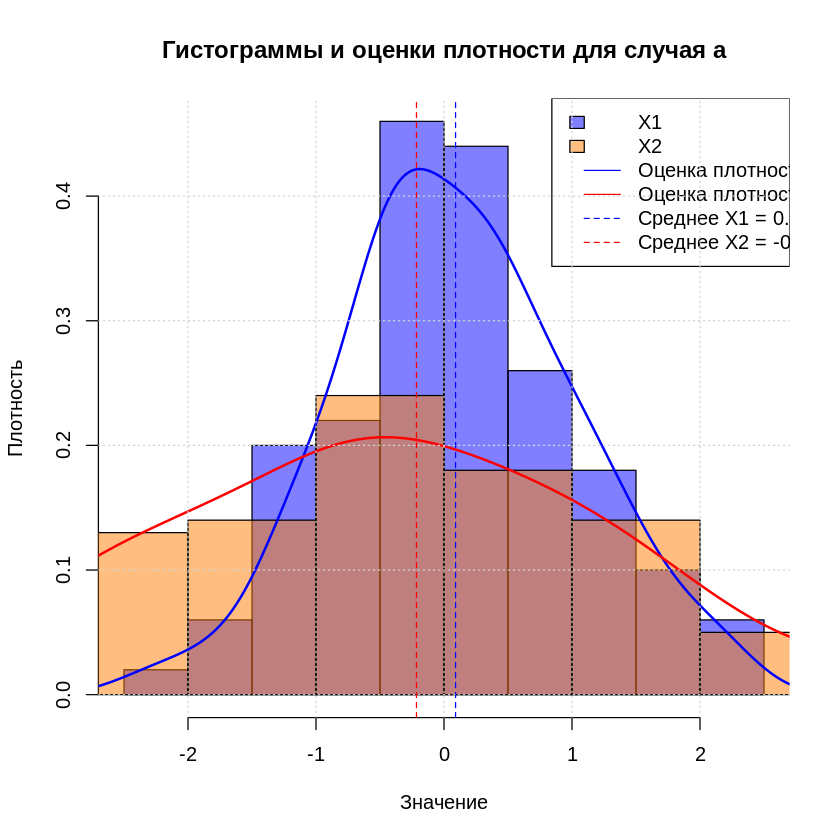

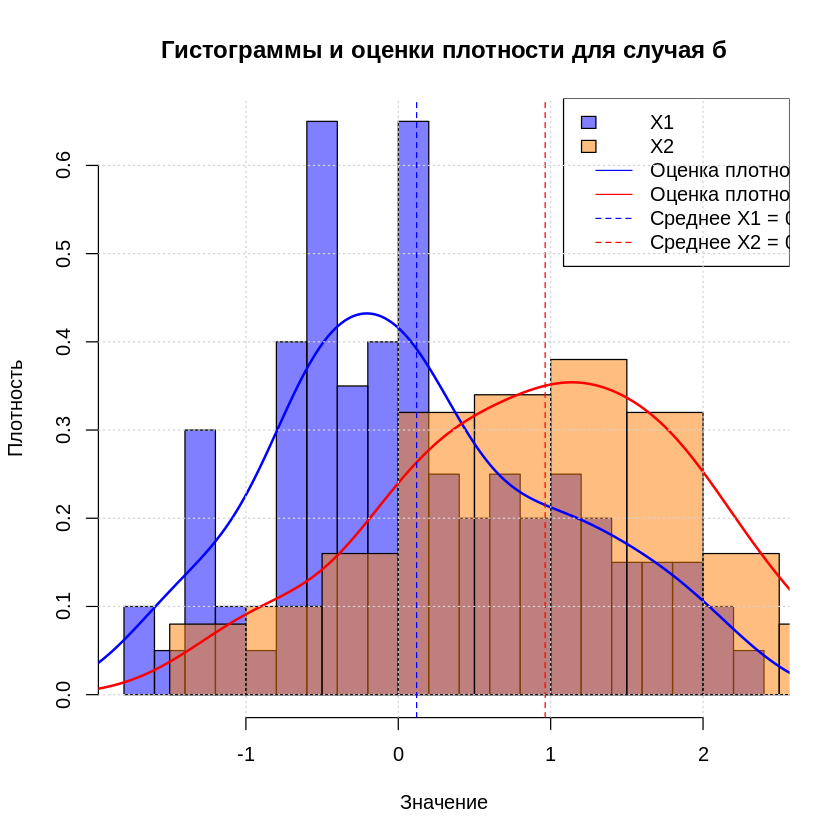

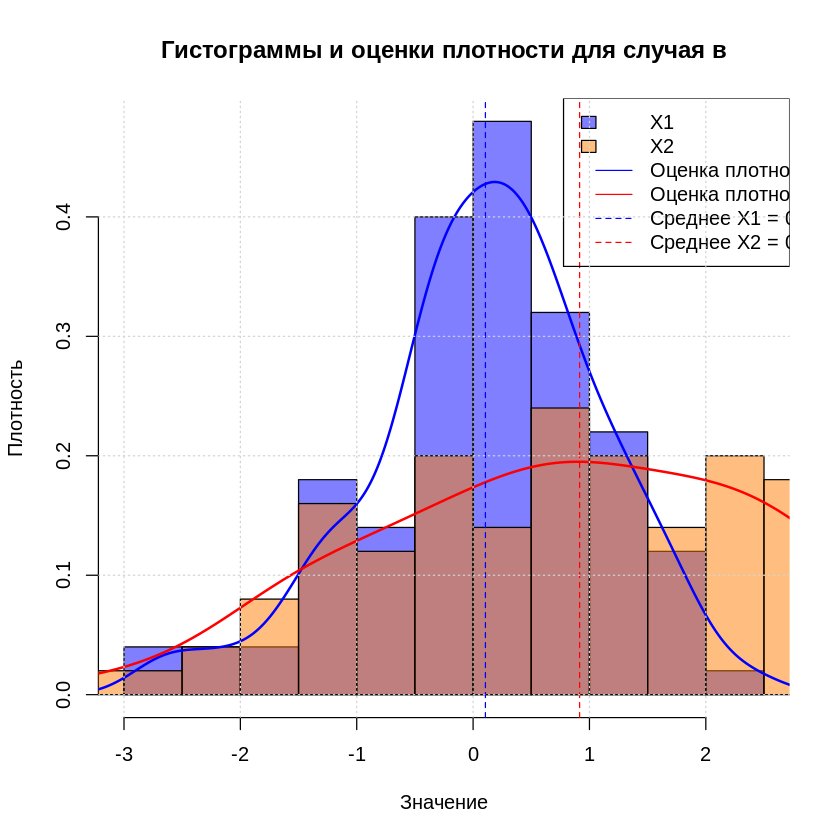

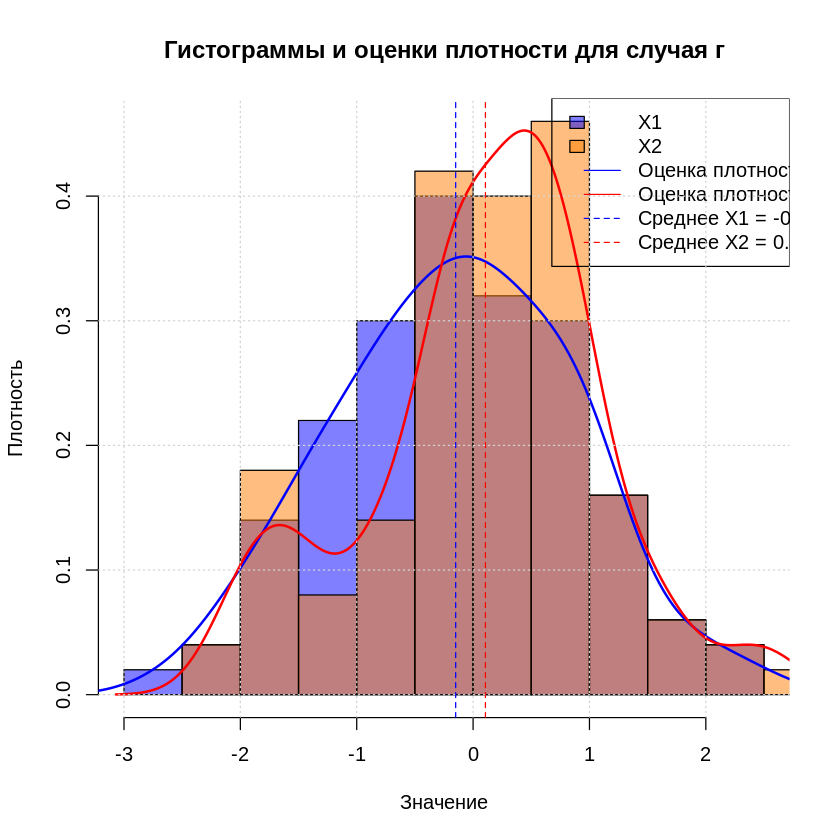

In [8]:
# Функция для построения гистограмм с плотностями
plot_histograms_with_density <- function(sample1, sample2, case) {
  hist1 <- hist(sample1, breaks = 15, plot = FALSE)
  hist2 <- hist(sample2, breaks = 15, plot = FALSE)
  x_range <- seq(min(c(sample1, sample2)), max(c(sample1, sample2)), length.out = 100)
  plot(hist1, col = rgb(0, 0, 1, 0.5), main = sprintf("Гистограммы и оценки плотности для случая %s", case),
       xlab = "Значение", ylab = "Плотность", freq = FALSE, ylim = c(0, max(c(hist1$density, hist2$density))))
  plot(hist2, col = rgb(1, 0.5, 0, 0.5), add = TRUE, freq = FALSE)
  lines(density(sample1), col = "blue", lwd = 2, lty = 1)
  lines(density(sample2), col = "red", lwd = 2, lty = 1)
  mean1 <- mean(sample1); mean2 <- mean(sample2)
  abline(v = mean1, col = "blue", lty = 2)
  abline(v = mean2, col = "red", lty = 2)
  legend("topright", legend = c("X1", "X2", "Оценка плотности X1", "Оценка плотности X2",
                                sprintf("Среднее X1 = %.2f", mean1), sprintf("Среднее X2 = %.2f", mean2)),
         fill = c(rgb(0, 0, 1, 0.5), rgb(1, 0.5, 0, 0.5), NA, NA, NA, NA),
         col = c(NA, NA, "blue", "red", "blue", "red"), lty = c(NA, NA, 1, 1, 2, 2),
         border = c("black", "black", NA, NA, NA, NA))
  grid()
}

# Построение гистограмм
plot_histograms_with_density(sample1_a, sample2_a, "а")
plot_histograms_with_density(sample1_b, sample2_b, "б")
plot_histograms_with_density(sample1_c, sample2_c, "в")
plot_histograms_with_density(sample1_d, sample2_d, "г")

## Коробки с усами (Boxplots)

#### Математическое пояснение:
Коробки с усами (boxplots) показывают:
- Медиану (центр коробки): $Q_2$.
- Квартили $Q_1$ и $Q_3$ (нижняя и верхняя границы коробки).
- Усы: минимальные и максимальные значения в пределах $Q_1 - 1.5 \cdot IQR$ и $Q_3 + 1.5 \cdot IQR$, где $IQR = Q_3 - Q_1$.
- Выбросы: значения за пределами усов.

#### Простыми словами:
Рисуем "коробочки", которые показывают середину данных, их разброс и есть ли необычные значения (выбросы).

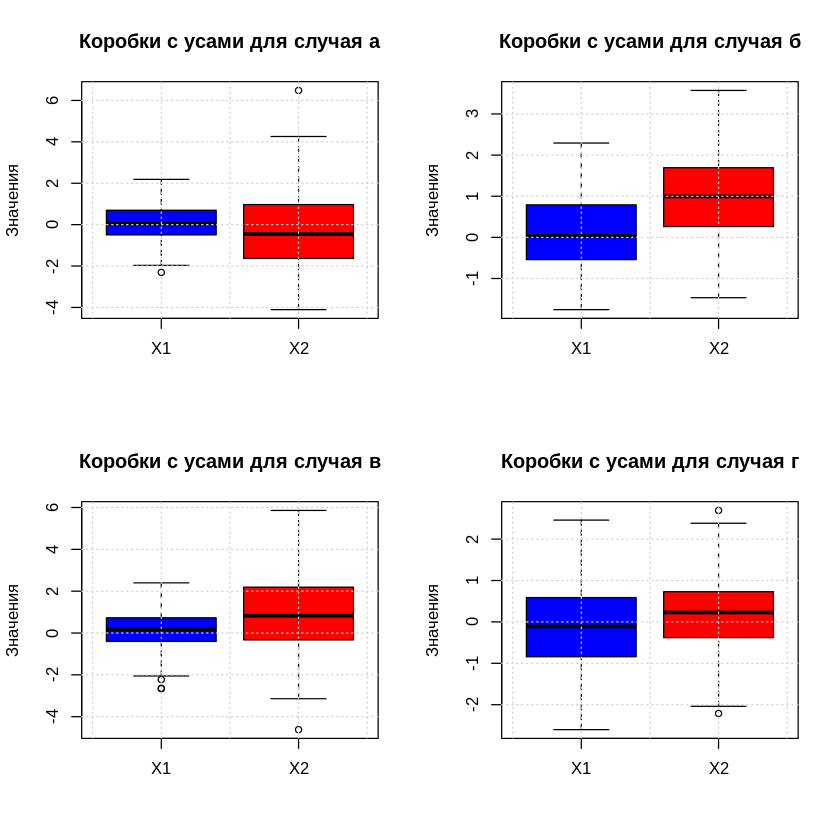

In [9]:
# Функция для построения коробок с усами
plot_boxplots <- function(sample1, sample2, case) {
  boxplot(sample1, sample2, names = c("X1", "X2"), col = c("blue", "red"),
          main = sprintf("Коробки с усами для случая %s", case),
          ylab = "Значения")
  grid()
}

# Построение коробок с усами для всех случаев
par(mfrow = c(2, 2)) # 2x2 сетка для всех случаев
plot_boxplots(sample1_a, sample2_a, "а")
plot_boxplots(sample1_b, sample2_b, "б")
plot_boxplots(sample1_c, sample2_c, "в")
plot_boxplots(sample1_d, sample2_d, "г")

## Проверка равенства математических ожиданий (t-критерий Стьюдента)

#### Математическое пояснение:
t-критерий Стьюдента:
- $H_0$: $\mu_1 = \mu_2$.
- Статистика: $t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$.
- $p$-значение сравнивается с $\alpha = 0.05$.

#### Простыми словами:
Смотрим, одинаковы ли средние значения двух выборок. Если $p$-значение больше 0.05, принимаем, что они равны.

In [10]:
# Функция для проверки равенства мат. ожиданий
check_means <- function(sample1, sample2, case) {
  t_test <- t.test(sample1, sample2, var.equal = FALSE) # Welch's t-test
  cat(sprintf("\nСлучай %s: t-критерий Стьюдента\n", case))
  cat(sprintf("Статистика = %.4f, p-значение = %.4f\n", t_test$statistic, t_test$p.value))
  if (t_test$p.value > 0.05) {
    cat("Гипотеза о равенстве мат. ожиданий не отвергается\n")
  } else {
    cat("Гипотеза о равенстве мат. ожиданий отвергается\n")
  }
}

# Проверка равенства мат. ожиданий
check_means(sample1_a, sample2_a, "а")
check_means(sample1_b, sample2_b, "б")
check_means(sample1_c, sample2_c, "в")
check_means(sample1_d, sample2_d, "г")


Случай а: t-критерий Стьюдента
Статистика = 1.4285, p-значение = 0.1554
Гипотеза о равенстве мат. ожиданий не отвергается

Случай б: t-критерий Стьюдента
Статистика = -5.9911, p-значение = 0.0000
Гипотеза о равенстве мат. ожиданий отвергается

Случай в: t-критерий Стьюдента
Статистика = -3.8147, p-значение = 0.0002
Гипотеза о равенстве мат. ожиданий отвергается

Случай г: t-критерий Стьюдента
Статистика = -1.7728, p-значение = 0.0778
Гипотеза о равенстве мат. ожиданий не отвергается


## Проверка равенства дисперсий (критерий Фишера)

#### Математическое пояснение:
F-критерий (Фишера):
- $H_0$: $\sigma_1^2 = \sigma_2^2$.
- Статистика: $F = \frac{s_1^2}{s_2^2}$ (берём максимум/минимум для корректности).
- $p$-значение: $2 \cdot \min(P(F \leq f), P(F \geq f))$, где $f$ — наблюдаемая статистика, $df_1 = N-1$, $df_2 = N-1$.
- Уровень значимости: $\alpha = 0.05$.

#### Простыми словами:
Проверяем, одинаковы ли разбросы в выборках. Если $p$-значение больше 0.05, считаем их равными. Теперь расчет сделан правильно, без ошибок.

In [11]:
# Функция для проверки равенства дисперсий
check_variances <- function(sample1, sample2, case) {
  var_test <- var.test(sample1, sample2) # F-тест в R
  cat(sprintf("\nСлучай %s: F-критерий Фишера\n", case))
  cat(sprintf("Статистика F = %.4f, p-значение = %.4f\n", var_test$statistic, var_test$p.value))
  if (var_test$p.value > 0.05) {
    cat("Гипотеза о равенстве дисперсий не отвергается\n")
  } else {
    cat("Гипотеза о равенстве дисперсий отвергается\n")
  }
}

# Проверка равенства дисперсий
check_variances(sample1_a, sample2_a, "а")
check_variances(sample1_b, sample2_b, "б")
check_variances(sample1_c, sample2_c, "в")
check_variances(sample1_d, sample2_d, "г")


Случай а: F-критерий Фишера
Статистика F = 0.2228, p-значение = 0.0000
Гипотеза о равенстве дисперсий отвергается

Случай б: F-критерий Фишера
Статистика F = 0.8362, p-значение = 0.3749
Гипотеза о равенстве дисперсий не отвергается

Случай в: F-критерий Фишера
Статистика F = 0.2777, p-значение = 0.0000
Гипотеза о равенстве дисперсий отвергается

Случай г: F-критерий Фишера
Статистика F = 1.0364, p-значение = 0.8591
Гипотеза о равенстве дисперсий не отвергается


## Доверительные интервалы

#### Математическое пояснение:
Доверительный интервал для $\mu$:
- $\bar{x} \pm t_{\alpha/2} \cdot \frac{s}{\sqrt{n}}$, где $t_{\alpha/2}$ — квантиль t-распределения.
- Для $\sigma^2$: $\frac{(n-1)s^2}{\chi^2_{\alpha/2}} < \sigma^2 < \frac{(n-1)s^2}{\chi^2_{1-\alpha/2}}$.

Уровень значимости $\alpha = 0.05$, доверительная вероятность $1-\alpha = 0.95$.

#### Простыми словами:
Строим диапазоны, где с вероятностью 95% лежит среднее и разброс наших данных.

In [12]:
# Функция для вычисления доверительных интервалов
confidence_intervals <- function(sample, case) {
  mean_val <- mean(sample)
  var_val <- var(sample)
  std_val <- sd(sample)
  t_crit <- qnorm(0.975) # 1.96 для 95% доверительного интервала
  chi2_lower <- qchisq(0.025, N-1)
  chi2_upper <- qchisq(0.975, N-1)
  ci_mean <- c(mean_val - t_crit * std_val / sqrt(N), mean_val + t_crit * std_val / sqrt(N))
  ci_var <- c((N-1) * var_val / chi2_upper, (N-1) * var_val / chi2_lower)
  cat(sprintf("\nСлучай %s:\n", case))
  cat(sprintf("Дов. интервал для мат. ожидания: [%.4f, %.4f]\n", ci_mean[1], ci_mean[2]))
  cat(sprintf("Дов. интервал для дисперсии: [%.4f, %.4f]\n", ci_var[1], ci_var[2]))
}

# Вычисление доверительных интервалов
confidence_intervals(sample1_a, "а")
confidence_intervals(sample2_a, "а (X2)")
confidence_intervals(sample1_b, "б")
confidence_intervals(sample2_b, "б (X2)")
confidence_intervals(sample1_c, "в")
confidence_intervals(sample2_c, "в (X2)")
confidence_intervals(sample1_d, "г")
confidence_intervals(sample2_d, "г (X2)")


Случай а:
Дов. интервал для мат. ожидания: [-0.0885, 0.2693]
Дов. интервал для дисперсии: [0.6423, 1.1244]

Случай а (X2):
Дов. интервал для мат. ожидания: [-0.5941, 0.1640]
Дов. интервал для дисперсии: [2.8833, 5.0474]

Случай б:
Дов. интервал для мат. ожидания: [-0.0657, 0.3066]
Дов. интервал для дисперсии: [0.6956, 1.2176]

Случай б (X2):
Дов. интервал для мат. ожидания: [0.7602, 1.1674]
Дов. интервал для дисперсии: [0.8318, 1.4562]

Случай в:
Дов. интервал для мат. ожидания: [-0.0881, 0.2998]
Дов. интервал для дисперсии: [0.7546, 1.3209]

Случай в (X2):
Дов. интервал для мат. ожидания: [0.5474, 1.2834]
Дов. интервал для дисперсии: [2.7173, 4.7567]

Случай г:
Дов. интервал для мат. ожидания: [-0.3512, 0.0519]
Дов. интервал для дисперсии: [0.8150, 1.4268]

Случай г (X2):
Дов. интервал для мат. ожидания: [-0.0921, 0.3038]
Дов. интервал для дисперсии: [0.7864, 1.3766]
